In [11]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import time
import pickle
import statistics

from graph import Graph
from gls import GLS 

In [12]:
 
def draw_graph(graph, solution, figsize):
   
    plt.figure(figsize=figsize)
    
    # moved edges first so that nodes appear on top ! 
    for node in graph.nodes.values():
        for neighbor_id in node.neighbors:
            neighbor = graph.nodes[neighbor_id]
            # Check if the nodes are in different partitions (red vs blue)
            if solution[node.id] != solution[neighbor.id]:
                # Draw edge as green and extra thicc
                plt.plot([node.x, neighbor.x], [node.y, neighbor.y], color="green", linewidth=6)
            else:                
                plt.plot([node.x, neighbor.x], [node.y, neighbor.y], color="gray", linewidth=1)
    
    # Draw nodes with colors 
    for node in graph.nodes.values():
        partition = solution[node.id]
        color = "orange" if partition == 1 else "lightblue"
        plt.scatter(node.x, node.y, color=color, s=300, edgecolors='black', zorder=3)
        plt.text(node.x, node.y, str(node.id), fontsize=12, ha='center', va='center', zorder=4)
    
    plt.title("Graph Partition")
    plt.axis("off")
    plt.show()


In [13]:
graph_filename = "Graph500.txt"
pop_size = 500
max_iterations = 300
random_seed = 42

# Run the GLS
#gls = GLS(
#    graph_filename=graph_filename,
#    pop_size=pop_size,
#    max_iterations=max_iterations,
#    random_seed=random_seed
#)
#best_cut = gls.run_gls()
#stats = gls.get_run_statistics()

#print(f"GLS best cut size for pop_size={pop_size}: {best_cut}")
#print("Run statistics:")
#print(stats)

#best_solution = gls.best_solution

#for the graph 
graph = Graph(graph_filename)

#pickle the solution with time stamp 
#timestamp = time.strftime("%Y%m%d-%H%M%S")
#solution_filename = f"solution_with_pop_size{pop_size}_with_iter_{max_iterations}_seed{random_seed}_{timestamp}.pkl"
#with open(solution_filename, "wb") as f:
#    pickle.dump(best_solution, f)
#    print(f"Solution saved to {solution_filename}")
with open("pckl/solution_with_pop_size500_with_iter_300_seed42_20250323-224218.pkl", "rb") as f:
    best_solution = pickle.load(f)

Number of nodes in each partition:
1    250
0    250
Name: count, dtype: int64


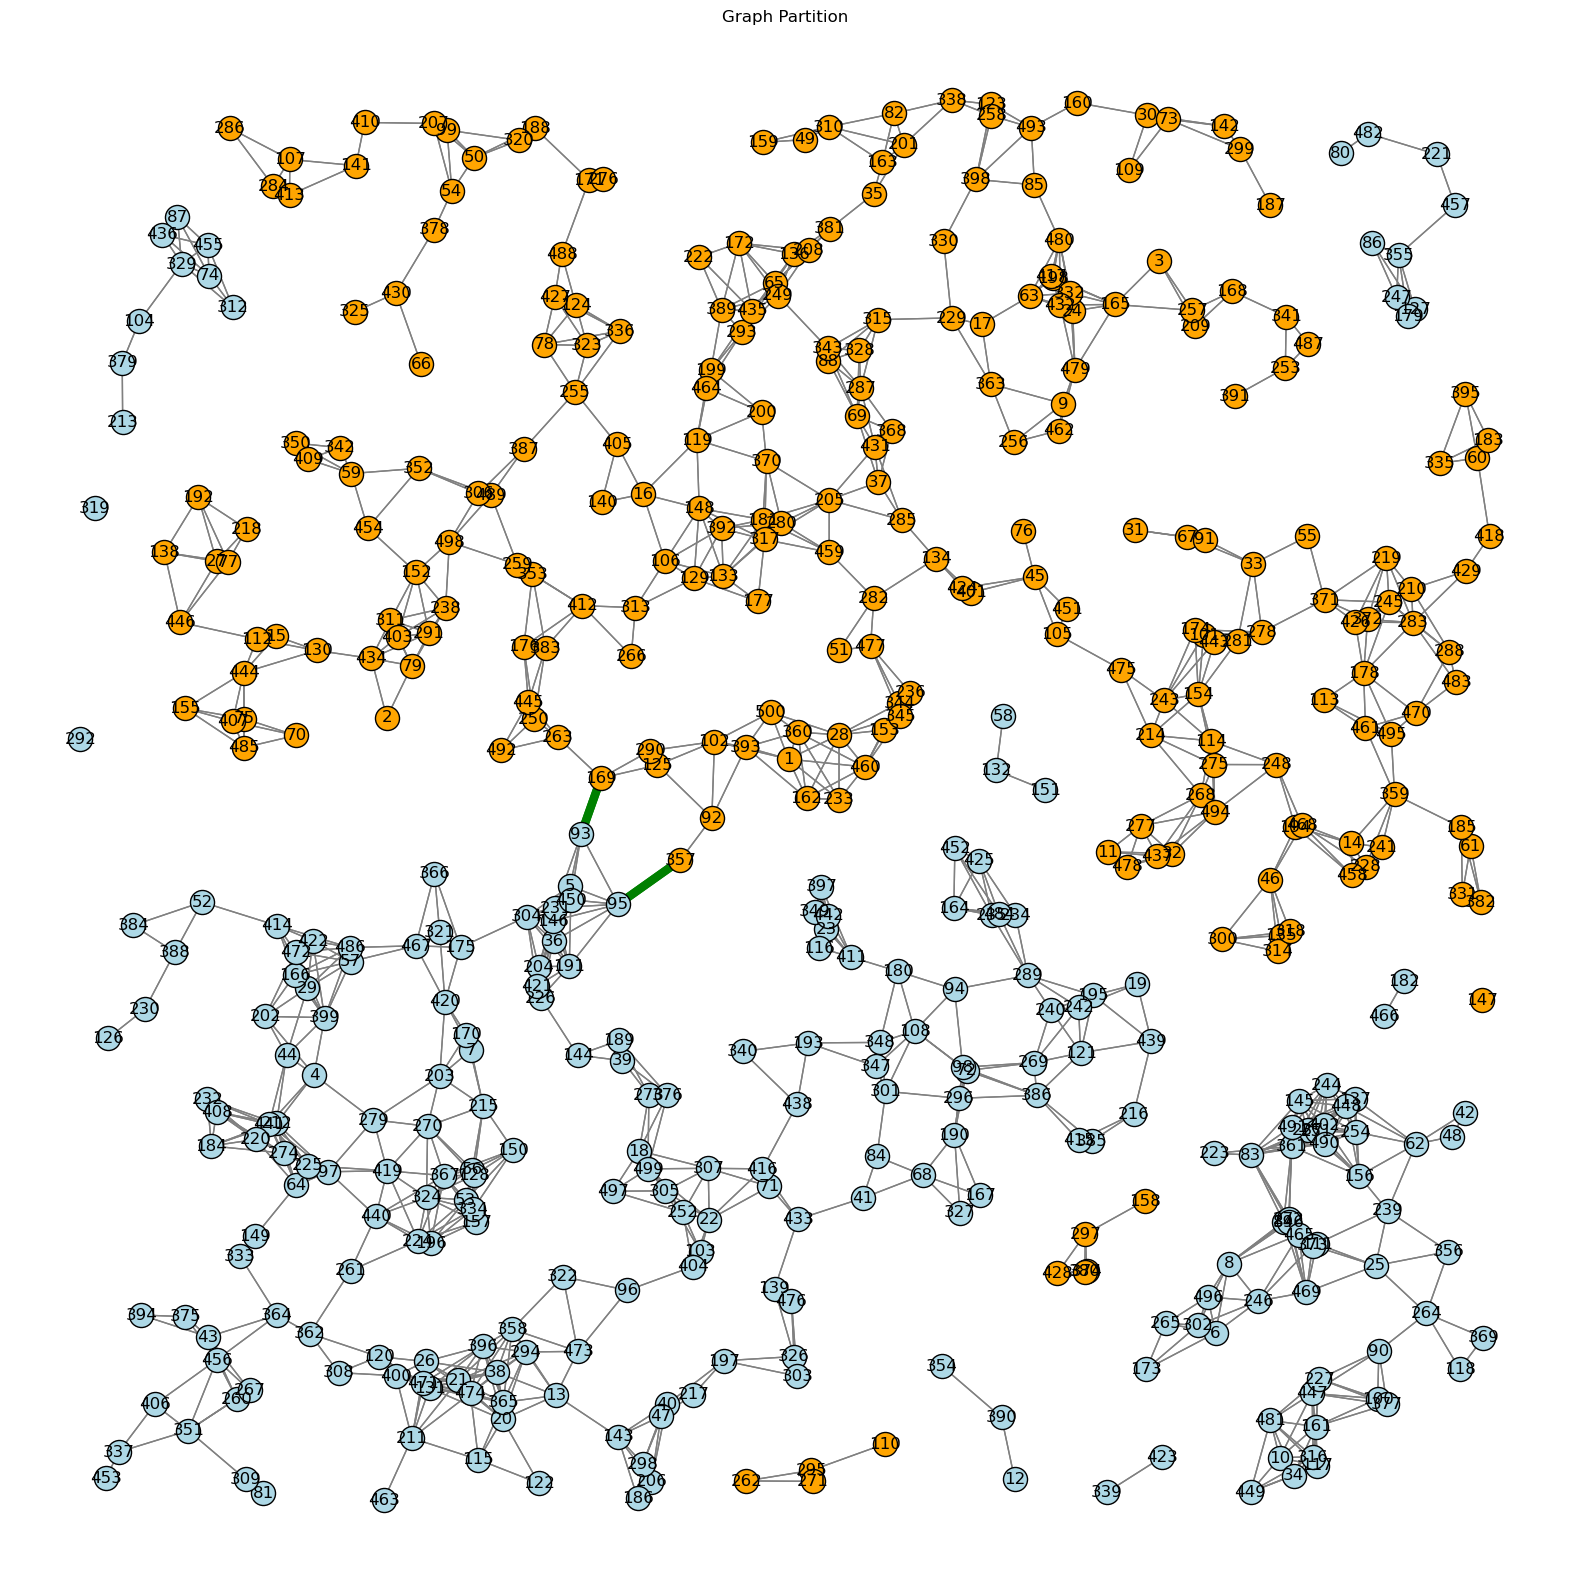

In [14]:
print("Number of nodes in each partition:")
print(pd.Series(best_solution).value_counts())
draw_graph(graph, best_solution, figsize=(20, 20))



In [15]:
import pickle 